<a href="https://colab.research.google.com/github/mahawarrachna7-lab/Assignment-1/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('/content/diabetes2.csv')
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
498,7,195,70,33,145,25.1,0.163,55,1
0,6,148,72,35,0,33.6,0.627,50,1
365,5,99,54,28,83,34.0,0.499,30,0
213,0,140,65,26,130,42.6,0.431,24,1
19,1,115,70,30,96,34.6,0.529,32,1


In [58]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [59]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Outcome'], axis=1),
                                                    df['Outcome'],
                                                    test_size=0.2,
                                                    random_state=2)

In [68]:
std = StandardScaler()

In [69]:
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [70]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')

In [71]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [72]:
y_pred = model.predict(X_test)

In [73]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

Accuracy:  0.7532467532467533
Recall:  0.7111111111111111
f1 score:  0.6274509803921569
Confusion Matrix:  [[84 25]
 [13 32]]


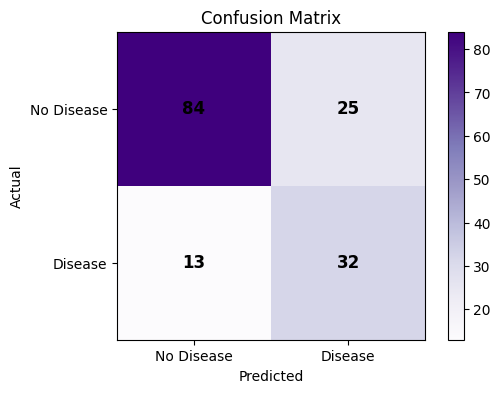

In [74]:



cm = np.array([[84, 25],
               [13, 32]])

plt.figure(figsize=(6,4))
plt.imshow(cm, cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.yticks([0, 1], ['No Disease', 'Disease'])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=12, fontweight='bold')

plt.colorbar()
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       109
           1       0.56      0.71      0.63        45

    accuracy                           0.75       154
   macro avg       0.71      0.74      0.72       154
weighted avg       0.78      0.75      0.76       154

